In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
city = 'medellin'
date = 'jul24'

In [58]:
time = pd.read_csv( './data/meta/time.csv' )

In [59]:
time[ 'date' ] = pd.to_datetime( time[ 'date' ], format = '%d/%m/%Y' )

In [60]:
time.dtypes

date    datetime64[ns]
time             int64
dtype: object

In [61]:
time.tail()

,date,time
128,2020-07-20,129
129,2020-07-21,130
130,2020-07-22,131
131,2020-07-23,132
132,2020-07-24,133


In [62]:
filename = ''
if city == 'bogota':
    filename = 'Bogota'
elif city == 'barranquilla':
    filename = 'Barranquilla'
elif city == 'cali':
    filename = 'Cali'
elif city == 'medellin':
    filename = 'Medellin'
    
meta = pd.read_csv( './data/meta/{}_{}.csv'.format( filename, date ) )

In [63]:
del meta[ 'Unnamed: 0' ]

In [64]:
meta.shape

(1330, 11)

In [65]:
meta.dtypes

replicate      int64
time           int64
S            float64
E            float64
A            float64
I1           float64
I2           float64
I3           float64
R            float64
D            float64
obs          float64
dtype: object

In [66]:
meta.tail( 20 )

,replicate,time,S,E,A,I1,I2,I3,R,D,obs
1310,10,113,2.507059e+06,11012.291389,2876.768704,4816.980528,332.320700,64.439395,5724.636544,27.732657,23.0
1311,10,114,2.502964e+06,12736.816392,3329.552421,5575.140314,384.753942,74.545383,6588.521503,31.201086,38.0
1312,10,115,2.498232e+06,14726.716197,3852.787989,6451.267596,445.418845,86.250847,7588.283914,35.213835,34.0
1313,10,116,2.492768e+06,17021.241468,4457.162514,7463.257302,515.586588,99.805209,8745.039200,39.856965,33.0
1314,10,117,2.486462e+06,19664.911248,5154.890999,8631.562742,596.718114,115.496039,10083.096489,45.229941,43.0
1315,10,118,2.479189e+06,22708.035509,5959.903096,9979.508299,690.490176,133.654613,11630.412120,51.447672,50.0
1316,10,119,2.470806e+06,26207.223785,6888.041579,11533.621772,798.824210,154.662190,13419.097617,58.642859,72.0
1317,10,120,2.461154e+06,30225.847863,7957.268659,13323.979827,923.917980,178.957054,15485.984079,66.968654,62.0
1318,10,121,2.450049e+06,34834.414783,9187.875137,15384.558224,1068.279973,207.042394,17873.246255,76.601712,90.0
1319,10,122,2.437290e+06,40110.794600,10602.683500,17753.571876,1234.766279,239.495052,20629.086008,87.745652,85.0


In [67]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

meta_grouped = meta.groupby( 'time' ).agg( { 'obs': [ 'mean', ci ] } ).reset_index().fillna( 0 )
meta_grouped.columns = [ '_'.join( col ).strip() for col in meta_grouped.columns.values ]
meta_grouped.rename( columns = { 'time_': 'time' }, inplace = True )

In [68]:
meta_grouped = meta_grouped.merge( time, how = 'left', on = 'time' )

In [69]:
meta_grouped = meta_grouped.loc[ meta_grouped[ 'date' ].notnull() ]

In [70]:
meta_grouped[ 'obs_lower' ] = meta_grouped[ 'obs_mean' ] - meta_grouped[ 'obs_ci' ]
meta_grouped[ 'obs_upper' ] = meta_grouped[ 'obs_mean' ] + meta_grouped[ 'obs_ci' ]

In [71]:
meta_grouped.head()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
1,1,0.0,0.0,2020-03-14,0.0,0.0
2,2,0.0,0.0,2020-03-15,0.0,0.0
3,3,0.0,0.0,2020-03-16,0.0,0.0
4,4,0.0,0.0,2020-03-17,0.0,0.0
5,5,0.0,0.0,2020-03-18,0.0,0.0


In [72]:
meta_grouped.tail()

,time,obs_mean,obs_ci,date,obs_lower,obs_upper
128,128,200.0,6.123236,2020-07-19,193.876764,206.123236
129,129,235.8,7.887874,2020-07-20,227.912126,243.687874
130,130,273.2,10.355776,2020-07-21,262.844224,283.555776
131,131,308.1,8.050090,2020-07-22,300.049910,316.150090
132,132,354.8,9.923873,2020-07-23,344.876127,364.723873


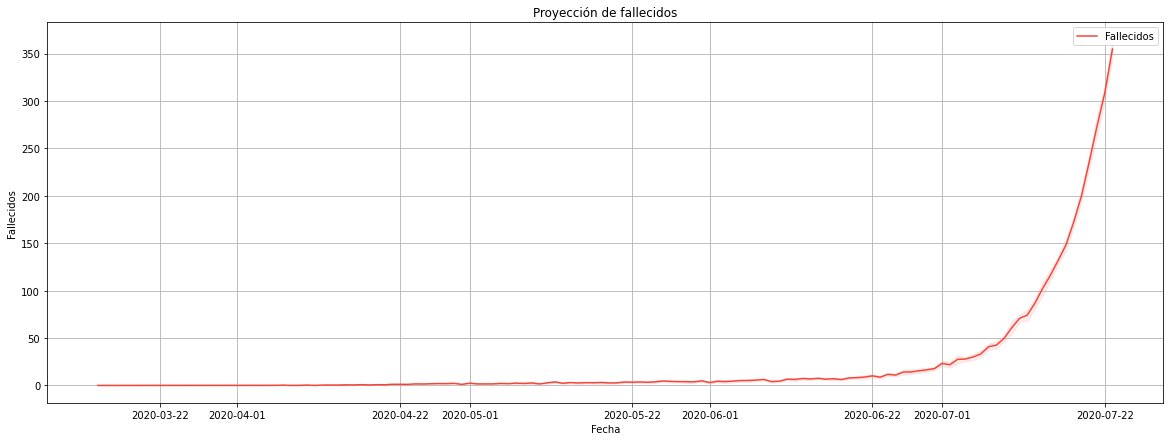

In [73]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( meta_grouped[ 'date' ], meta_grouped[ 'obs_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( meta_grouped[ 'date' ], meta_grouped[ 'obs_lower' ], meta_grouped[ 'obs_upper' ], color = '#f64438', alpha = .1 )

plt.title( 'Proyección de fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Fallecidos' )
plt.grid( True )
plt.legend()

In [74]:
meta_grouped.to_csv( './data/meta/seir_{}.csv'.format( city ), index = False )